# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [55]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [56]:
def f(x):
    return x**2*numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [57]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [58]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [59]:
assert g(0) == 0.

In [60]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [61]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [62]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [63]:
def integrate_numeric(xmin, xmax, N):
    delta_x=(xmax-xmin)/N
    sum_over_mid=0
    sum_over_2ends=0
    
    for i in range(0,N):
        sum_over_mid+= 4*f(xmin + i*delta_x + 0.5*delta_x )  
    
    for i in range(1, N):
        sum_over_2ends+=  2*f( xmin+ i*delta_x  ) 
    
    total_answer= (delta_x/6)*( sum_over_mid + sum_over_2ends + f(xmin) + f(xmax) )

    return total_answer


##Numerical integral of f from xmin to xmax using Simpson's rule with N panels.
    
## YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [64]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [65]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


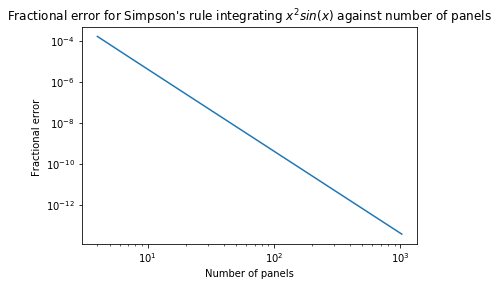

In [66]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_numeric=numpy.zeros(len(panel_counts))
for i in range(0,len(result_numeric)):
    result_numeric[i]=integrate_numeric(x0,x1,panel_counts[i])
    
fractional_error=numpy.zeros(len(panel_counts))
for i in range(0, len(fractional_error)):
    fractional_error[i]=abs((result_numeric[i]-result_analytic)/result_analytic)
    
figure1=plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(panel_counts, fractional_error)
plt.xlabel("Number of panels")
plt.ylabel("Fractional error ")
plt.title(r"Fractional error for Simpson's rule integrating $x^2sin(x)$ against number of panels")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general, the greater the number of panels, the more accurate the numerical method. The error scales like $N^{-4}$ (where N is the number of panels). However, if the number of panels is too large, the method becomes less accurate because when the number of panels becomes very large, $\Delta x$ becomes very small. The computer stores numbers in floating point form, so at each stage of any calculations it does, it rounds the numbers if they have too many decimal places for the computer to store, and if it ends up calculating a number with some of the decimal places not filled, the computer fills these in a deterministic way but not in a fashion such that it will yield the correct value for all calculations. Thus, if $\Delta x$ is too small, when the computer does the numeric integration, when it calculates the x values at the ends of the panels and when it calculates the final answer by multiplying by $(\Delta x)/6 $ the rounding causes the computer to lose a lot of percentage accuracy, because when the value of $\Delta x$ is very small, rounding it changes it by a large proportion of what the value of $\Delta x$ actually is and so the final calculation of the numeric integration is changed by a large proportion of what the actual value should be.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule, increasing the panel count, would in general increase accuracy. The error scales like $N^{-2}$ (where N is the number of panels). If the number of panels is too small, the method loses accuracy, because you are effectively chopping up the area you are integrating to find into trapeziums and if there are too few of these trapeziums, there will either be a big gap under the curve you are trying to integrate, or the trapeziums will be too big an estimate, and be much larger than the area of integration. The more trapeziums you have, the smaller they are and there is less discrepancy between the area from numeric integration and the analytic integration. So, if N is very small, the method loses accuracy. If N is too large, the width of the trapeziums becomes very small. The way that the computer stores numbers (in floating point form), means that they are rounded in calculations or if there is a number with some of the decimal places not filled, the computer fills these in a deterministic way but not in a fashion such that it will yield the correct value for all calculations. If the width of the trapeziums is very small, when their area is calculated, the rounded value of their width is far from the actual value of their width, so the area of the trapeziums is not accurately calculated, so the method loses some accuracy when implemented in this way on a computer.